# Load database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [9]:
# Carregar variáveis de ambiente do arquivo .env
load_dotenv()

# Obter caminhos do arquivo csv e do diretório de extração das variáveis de ambiente
agencia_path = os.getenv('AGENCIAS_CSV')

In [10]:
# Carregar o CSV em um DataFrame Pandas
df_agencias = pd.read_csv(agencia_path)

# Verificar as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
df_agencias.head()


,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física


**Análise inicial do Dataframe**

In [11]:
df_agencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes


In [12]:
df_agencias.describe()

,cod_agencia
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


**Verificar dados faltantes**

In [13]:
df_agencias.isna().any()

cod_agencia      False
nome             False
endereco         False
cidade           False
uf               False
data_abertura    False
tipo_agencia     False
dtype: bool

Vamos selecionar somente os dados categóricos, pois nesta base de dados somente o nº da agência é do tipo numérico.

In [14]:
df_agencias.select_dtypes("object").describe().transpose()

,count,unique,top,freq
nome,10,10,Agência Digital,1
endereco,10,9,"Av. Paulista, 1436 - Cerqueira César, São Paul...",2
cidade,10,7,São Paulo,4
uf,10,5,SP,6
data_abertura,10,10,2015-08-01,1
tipo_agencia,10,2,Física,9


Podemos observar que SP é o lugar com mais agência, e a maioria são físicas.
A agência da Av. Paulista 1436 é a única com tipo Física e Digital.

# Visualizações por gráficos

**Contagem de Agências por Tipo de Agência**

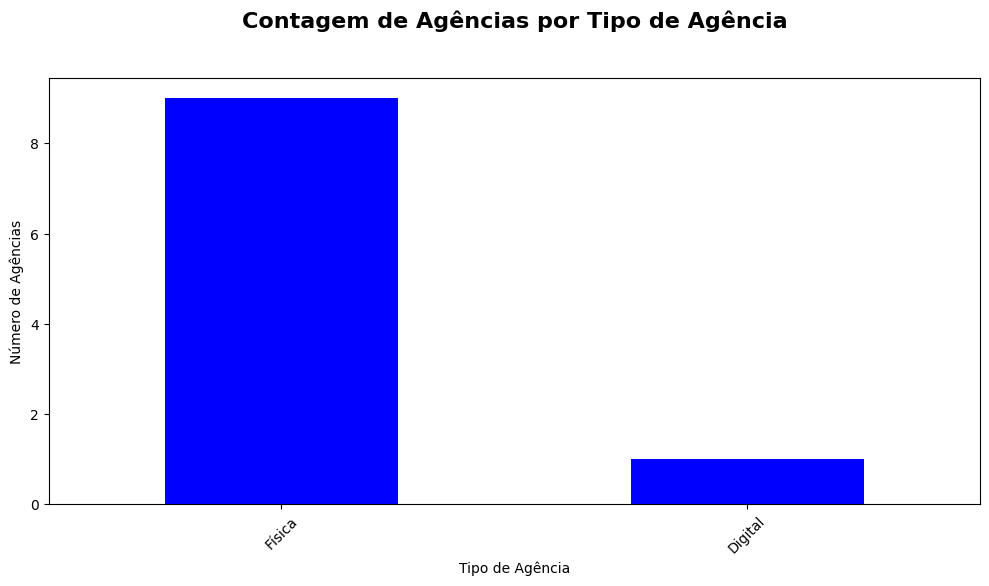

In [15]:
# Contagem de agências por tipo de agência
agencia_counts = df_agencias['tipo_agencia'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
agencia_counts.plot(kind='bar', color='blue')
plt.title('Contagem de Agências por Tipo de Agência', y=1.1, fontweight='bold', fontsize=16)
plt.xlabel('Tipo de Agência')
plt.ylabel('Número de Agências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Temos mais Agências Físicas do que Digital.

**Distribuição de Agências por Estado (UF)**

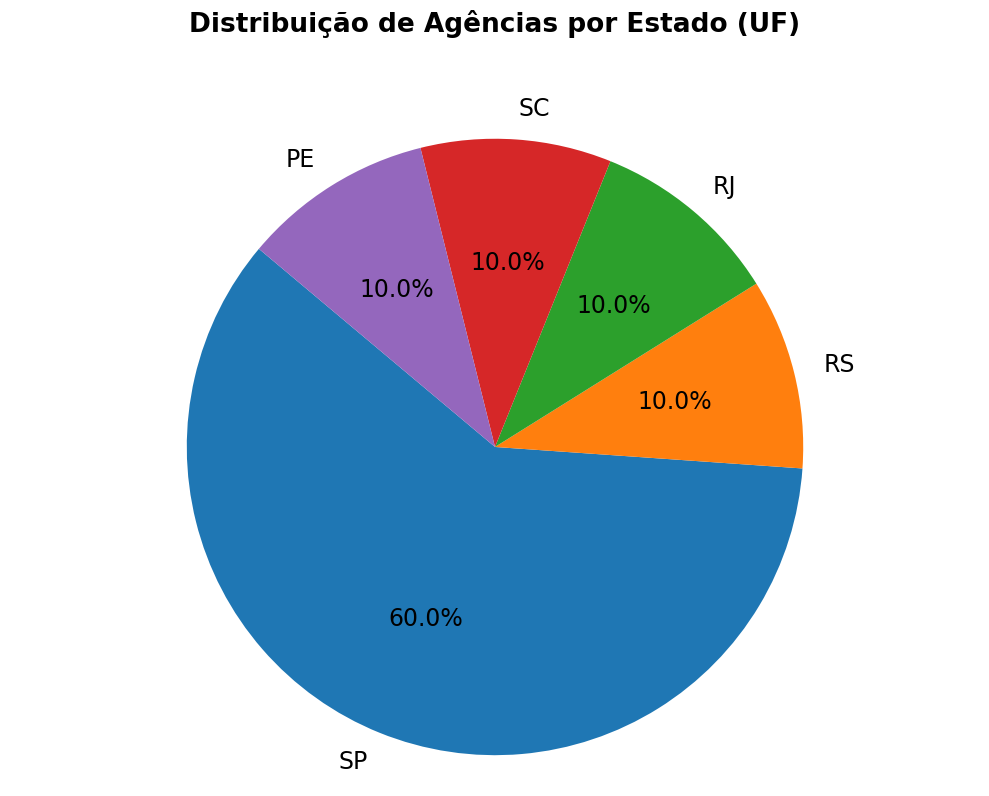

In [16]:
# Contagem de agências por estado (UF)
uf_counts = df_agencias['uf'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(uf_counts, labels=uf_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 17})
plt.title('Distribuição de Agências por Estado (UF)', y=1.1, fontweight='bold', fontsize=19)
plt.axis('equal')
plt.tight_layout()
plt.show()


**Análise de Aberturas de Agências ao Longo do Tempo**

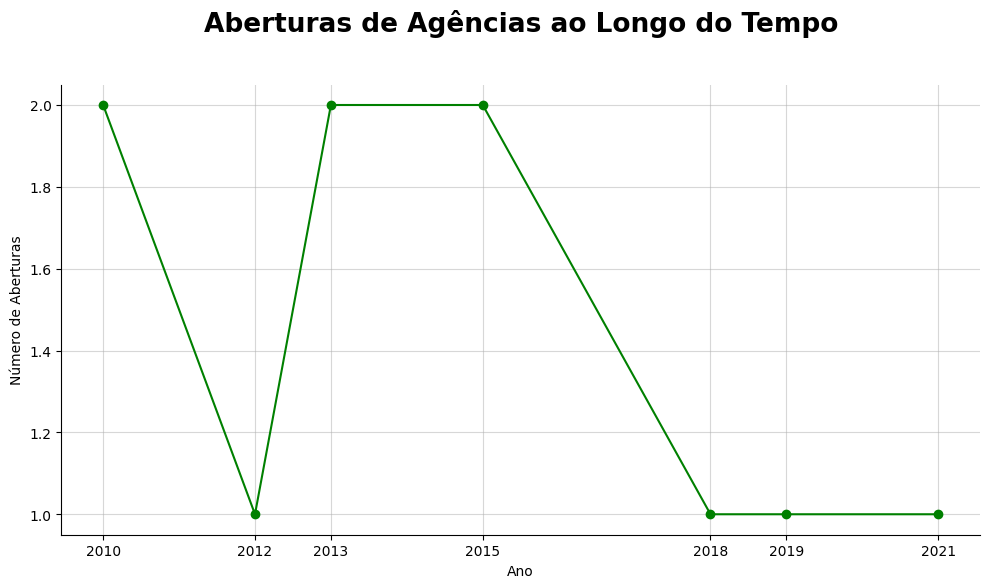

In [17]:
# Converter data_abertura para datetime se necessário
df_agencias['data_abertura'] = pd.to_datetime(df_agencias['data_abertura'], format='%Y-%m-%d')

# Contagem de aberturas de agências por ano
df_agencias['ano_abertura'] = df_agencias['data_abertura'].dt.year
aberturas_por_ano = df_agencias['ano_abertura'].value_counts().sort_index()

# Plotar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(aberturas_por_ano.index, aberturas_por_ano.values, marker='o', linestyle='-', color='green')
plt.title('Aberturas de Agências ao Longo do Tempo', y=1.1, fontweight='bold', fontsize=19)
plt.xlabel('Ano')
plt.ylabel('Número de Aberturas')
plt.xticks(aberturas_por_ano.index)
plt.grid(True, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()